In [1]:
import numpy as np
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

#for RBN
from keras.layers import Layer, Flatten, Dense
from keras import backend as K
from sklearn.metrics import classification_report


from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from tensorflow.keras.utils import to_categorical


In [2]:
#fixed random seed for reproducibility 
np.random.seed(0)

In [3]:
# load dataset (input variables = X, output variables = Y)
df = pd.read_csv("TrainingData.csv")

#count the number of occurances for each osID
OsID_counts = df['OsID'].value_counts()

#filter for osIDs that have 10 or more occurances
OsID_counts_filtered = OsID_counts[OsID_counts >= 10]

#assign a label for each osID 
OsID_labels = {}
class_no = 1
for osID in OsID_counts_filtered.index:
    OsID_labels[osID] = class_no
    class_no +=1

#filter the dataset with osID that contain 10 or more occurances
dataGene = df[df['OsID'].isin(OsID_counts_filtered.index)]

dataGene = dataGene.drop(['Class', 'Trait'],axis=1)

# Add a new column 'class' to the filtered dataset
dataGene['class'] = dataGene['OsID'].map(OsID_labels)

print("Summary of dataGene:\n",dataGene.describe())


Summary of dataGene:
        log_2FoldChange            ET  CoExpression           PCC  \
count     41110.000000  41110.000000  41110.000000  41110.000000   
mean         -0.037332      1.407395      0.991997     -0.361737   
std           0.391444      0.784327      0.089101      0.463979   
min          -1.000000      0.000000      0.000000     -1.000000   
25%          -0.251534      1.000000      1.000000     -0.747963   
50%           0.030675      2.000000      1.000000     -0.449089   
75%           0.251534      2.000000      1.000000     -0.051646   
max           1.000000      2.000000      1.000000      1.000000   

                PPI  Root10DaysSeedling  Root14DaysSeedling  \
count  41110.000000        41110.000000        41110.000000   
mean       0.914668           -0.522040           -0.646982   
std        0.279379            0.498568            0.393549   
min        0.000000           -1.000000           -1.000000   
25%        1.000000           -0.901371           

In [4]:
X = dataGene.drop(['class','OsID'], axis=1) # exclude class & OsID column
Y = dataGene['class']

#input feature names in order of descending importance scores in MI feature selection method
feature_names = ['CoExpression', 'PCC', 'PPI', 'Root10DaysSeedling', 'Leaf21DaysSeedling', 
                 'Leaf45DaysOldPlant', 'log_2FoldChange', 'ET', 'Shoot10DaysSeedling', 'Shoot3DaysSeedling', 
                 'Shoot35DaysSeedling', 'Shoot14DaysSeedling', 'Root17DaysSeedling', 'Shoot17DaysSeedling', 'Shoot21DaysSeedling', 
                 'Root24DaysSeedling', 'Root14DaysSeedling', 'Root21DaysSeedling', 'Root52DaysSeedling', 'Root35DaysSeedling']

X_fs = X.reindex(columns=feature_names)

print("Shape of X:\n",X_fs.shape)
print("Shape of Y:\n",Y.shape)

# Statistical summary of the variables
print("Summary of X:\n",X_fs.describe())
print("Summary of Y:\n",Y.describe())

# Check for class imbalance
print(df.groupby(Y).size())

# change both input and target variables datatype to ndarray
X_fs = X_fs.values # 2-D array

# select target variable 

Y = Y.values #1-D array
Y = Y.reshape(-1, 1)

Shape of X:
 (41110, 20)
Shape of Y:
 (41110,)
Summary of X:
        CoExpression           PCC           PPI  Root10DaysSeedling  \
count  41110.000000  41110.000000  41110.000000        41110.000000   
mean       0.991997     -0.361737      0.914668           -0.522040   
std        0.089101      0.463979      0.279379            0.498568   
min        0.000000     -1.000000      0.000000           -1.000000   
25%        1.000000     -0.747963      1.000000           -0.901371   
50%        1.000000     -0.449089      1.000000           -0.663664   
75%        1.000000     -0.051646      1.000000           -0.378497   
max        1.000000      1.000000      1.000000            1.000000   

       Leaf21DaysSeedling  Leaf45DaysOldPlant  log_2FoldChange            ET  \
count        41110.000000        41110.000000     41110.000000  41110.000000   
mean            -0.828778           -0.585144        -0.037332      1.407395   
std              0.327542            0.399046         0.39

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=1800 (4.378%)
Class=1, n=1296 (3.153%)
Class=2, n=1260 (3.065%)
Class=3, n=1218 (2.963%)
Class=4, n=1026 (2.496%)
Class=5, n=1008 (2.452%)
Class=6, n=930 (2.262%)
Class=7, n=912 (2.218%)
Class=8, n=880 (2.141%)
Class=9, n=798 (1.941%)
Class=10, n=792 (1.927%)
Class=11, n=759 (1.846%)
Class=12, n=729 (1.773%)
Class=13, n=720 (1.751%)
Class=14, n=702 (1.708%)
Class=15, n=693 (1.686%)
Class=16, n=672 (1.635%)
Class=17, n=640 (1.557%)
Class=18, n=625 (1.520%)
Class=19, n=570 (1.387%)
Class=20, n=546 (1.328%)
Class=21, n=506 (1.231%)
Class=22, n=483 (1.175%)
Class=23, n=448 (1.090%)
Class=24, n=432 (1.051%)
Class=25, n=384 (0.934%)
Class=26, n=360 (0.876%)
Class=27, n=360 (0.876%)
Class=28, n=320 (0.778%)
Class=29, n=312 (0.759%)
Class=30, n=312 (0.759%)
Class=31, n=306 (0.744%)
Class=32, n=304 (0.739%)
Class=33, n=299 (0.727%)
Class=34, n=297 (0.722%)
Class=35, n=296 (0.720%)
Class=36, n=280 (0.681%)
Class=37, n=264 (0.642%)
Class=38, n=260 (0.632%)
Class=39, n=253 (0.615%)
Clas

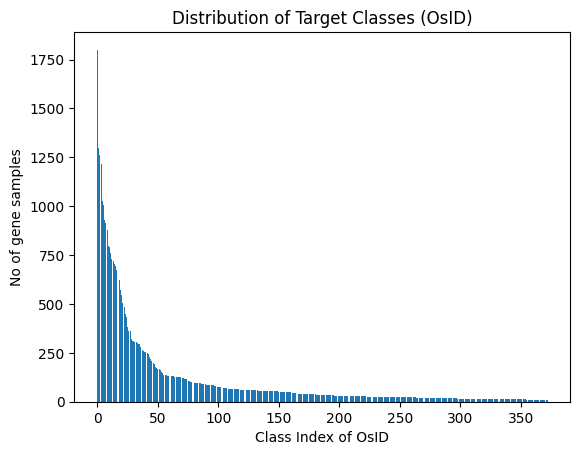

In [5]:
y_labelenc = LabelEncoder().fit_transform(Y)

from collections import Counter
# summarize distribution
counter = Counter(y_labelenc)

# sort counter by keys
counter = dict(sorted(counter.items()))


for k,v in counter.items():
 per = v / len(y_labelenc) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar( counter.keys(), counter.values())

plt.ylabel('No of gene samples')
plt.xlabel('Class Index of OsID')
plt.title('Distribution of Target Classes (OsID)')
plt.show()

In [6]:
# prepare target data
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	
	#fit the encoders only to the training data and then transform both train and test data
	y_train_enc = le.fit_transform(y_train)
	y_test_enc = le.transform(y_test)

	return y_train_enc, y_test_enc

In [7]:
# define the RBFLayer layer as a custom layer
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [8]:
# prepare target data
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	
	#fit the encoders only to the training data and then transform both train and test data
	y_train_enc = le.fit_transform(y_train)
	y_test_enc = le.transform(y_test)

	return y_train_enc, y_test_enc

In [9]:
# define baseline model (RBFN)
def RBFN_model(input_dim):

    model = Sequential()
    model.add(Flatten(input_shape=(input_dim,)))
    #add the RBF layer
    model.add(RBFLayer(10, 0.5))
    
    model.add(Dense(60, input_dim=input_dim, activation='relu',bias_initializer='normal',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(20,bias_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(20,bias_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dense(373,kernel_initializer='normal',activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [10]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_fs, Y, test_size=0.33, random_state=1)

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
# Define the number of folds for k-fold cross-validation
k = 2

# Define the cross-validation method
cv_method = StratifiedKFold(n_splits=k)

# Initialize the list to store the history, train & validation(accuracy & loss) for each model
models = []
model_history = []
model_accuracy = []
model_train_acc = []
model_train_loss = []
model_val_acc = []
model_val_loss = []


for i in range(1,21):

    models_fold = []
    hist = []
    train_accuracy = []
    train_loss = []
    val_accuracy = []
    val_loss = []
    test_accuracy = []

    print("Number of input features:",i)

    # Select the input features from the input data
    X_train_selected = X_train[:, :i]
    X_test_selected = X_test[:, :i]

    # Loop over the folds
    for fold, (train_index, val_index) in enumerate(cv_method.split(X_train_selected, y_train)):

        print("Fold:", fold+1)

        # Split the data into train and validation sets using the current fold index
        X_train_fold  = X_train_selected[train_index]
        y_train_fold  = y_train[train_index]
        X_val_fold = X_train_selected[val_index]
        y_val_fold = y_train[val_index]

        # Prepare the target data
        y_train_fold_enc, y_val_fold_enc = prepare_targets(y_train_fold, y_val_fold)

        # build the model
        model = RBFN_model(i)

        # Fit the model to the training data for the current fold
        history = model.fit(X_train_fold, to_categorical(y_train_fold_enc, num_classes=373), epochs=40, batch_size=5, verbose=1, validation_split = 0.33)
    
        # Evaluate the model on the validation data for the current fold
        val_scores = model.evaluate(X_val_fold, to_categorical(y_val_fold_enc, num_classes=373), verbose=0)
        val_accuracy.append(val_scores[1])
        val_loss.append(val_scores[0])

        # Evaluate the model on the test data for the current fold
        test_scores = model.evaluate(X_test_selected, to_categorical(y_test_enc, num_classes=373), verbose=0)
        test_accuracy.append(test_scores[1])

        # add the model to the list of models
        models_fold.append(model)
        hist.append(history)

        # store the training accuracy and loss for each fold
        train_accuracy.append(history.history['accuracy'])
        train_loss.append(history.history['loss'])
        
    # Calculate the average test and validation accuracy and loss across all folds
    avg_test_acc = sum(test_accuracy) / len(test_accuracy)
    avg_val_acc = sum(val_accuracy) / len(val_accuracy)
    avg_val_loss = sum(val_loss) / len(val_loss)

    # Print the average validation and test accuracy and loss
    print("Average Validation Accuracy:", avg_val_acc)
    print("Average Validation Loss:",avg_val_loss)
    print("Average Test Accuracy:", avg_test_acc)

    best_fold_index = test_accuracy.index(max(test_accuracy))
    model_accuracy.append(test_accuracy[best_fold_index])
    models.append(models_fold[best_fold_index])
    model_history.append(hist[best_fold_index])
    model_train_acc.append(train_accuracy[best_fold_index])
    model_train_loss.append(train_loss[best_fold_index])
    model_val_acc.append(val_accuracy[best_fold_index])
    model_val_loss.append(val_loss[best_fold_index])


    print("Final Test Accuracy for each fold:", test_accuracy[best_fold_index])

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of input features: 1
Fold: 1
Epoch 1/40
1846/1846 [==============================] - 12s 5ms/step - loss: 5.1042 - accuracy: 0.0403 - val_loss: 5.0441 - val_accuracy: 0.0436
Epoch 2/40
1846/1846 [==============================] - 8s 5ms/step - loss: 4.9823 - accuracy: 0.0438 - val_loss: 5.0351 - val_accuracy: 0.0436
Epoch 3/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.9749 - accuracy: 0.0440 - val_loss: 5.0359 - val_accuracy: 0.0436
Epoch 4/40
1846/1846 [==============================] - 12s 6ms/step - loss: 4.9713 - accuracy: 0.0440 - val_loss: 5.0351 - val_accuracy: 0.0436
Epoch 5/40
1846/1846 [==============================] - 12s 7ms/step - loss: 4.9688 - accuracy: 0.0440 - val_loss: 5.0338 - val_accuracy: 0.0436
Epoch 6/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.9666 - accuracy: 0.0440 - val_loss: 5.0352 - val_accuracy: 0.0436
Epoch 7/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.9605 - accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 12s 5ms/step - loss: 5.0965 - accuracy: 0.0403 - val_loss: 5.0382 - val_accuracy: 0.0436
Epoch 2/40
1846/1846 [==============================] - 9s 5ms/step - loss: 4.9781 - accuracy: 0.0440 - val_loss: 5.0316 - val_accuracy: 0.0436
Epoch 3/40
1846/1846 [==============================] - 9s 5ms/step - loss: 4.9704 - accuracy: 0.0439 - val_loss: 5.0333 - val_accuracy: 0.0436
Epoch 4/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.9611 - accuracy: 0.0440 - val_loss: 5.0197 - val_accuracy: 0.0436
Epoch 5/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.9115 - accuracy: 0.0501 - val_loss: 4.9496 - val_accuracy: 0.0473
Epoch 6/40
1846/1846 [==============================] - 9s 5ms/step - loss: 4.8687 - accuracy: 0.0527 - val_loss: 4.9458 - val_accuracy: 0.0574
Epoch 7/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.8482 - accuracy: 0.0533 - val_loss: 4.9343 - val_accur

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 17s 6ms/step - loss: 5.1002 - accuracy: 0.0427 - val_loss: 5.0307 - val_accuracy: 0.0627
Epoch 2/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.8380 - accuracy: 0.0735 - val_loss: 4.8182 - val_accuracy: 0.0706
Epoch 3/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.7069 - accuracy: 0.0759 - val_loss: 4.7628 - val_accuracy: 0.0706
Epoch 4/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.6518 - accuracy: 0.0793 - val_loss: 4.7398 - val_accuracy: 0.0706
Epoch 5/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.6197 - accuracy: 0.0834 - val_loss: 4.7118 - val_accuracy: 0.0759
Epoch 6/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.6028 - accuracy: 0.0832 - val_loss: 4.7268 - val_accuracy: 0.0772
Epoch 7/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.5881 - accuracy: 0.0836 - val_loss: 4.7043 - val_ac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 14s 6ms/step - loss: 5.0491 - accuracy: 0.0399 - val_loss: 4.9450 - val_accuracy: 0.0436
Epoch 2/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.5993 - accuracy: 0.0904 - val_loss: 4.4336 - val_accuracy: 0.1153
Epoch 3/40
1846/1846 [==============================] - 10s 6ms/step - loss: 4.1633 - accuracy: 0.1256 - val_loss: 4.1707 - val_accuracy: 0.1135
Epoch 4/40
1846/1846 [==============================] - 10s 6ms/step - loss: 3.8966 - accuracy: 0.1514 - val_loss: 3.9299 - val_accuracy: 0.1575
Epoch 5/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.6537 - accuracy: 0.1891 - val_loss: 3.7085 - val_accuracy: 0.2026
Epoch 6/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.4029 - accuracy: 0.2320 - val_loss: 3.4885 - val_accuracy: 0.2363
Epoch 7/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.1895 - accuracy: 0.2667 - val_loss: 3.3145 - val_ac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 14s 6ms/step - loss: 5.0652 - accuracy: 0.0408 - val_loss: 4.9434 - val_accuracy: 0.0704
Epoch 2/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.4951 - accuracy: 0.0934 - val_loss: 4.2963 - val_accuracy: 0.1212
Epoch 3/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.0339 - accuracy: 0.1330 - val_loss: 4.0377 - val_accuracy: 0.1408
Epoch 4/40
1846/1846 [==============================] - 10s 6ms/step - loss: 3.7645 - accuracy: 0.1718 - val_loss: 3.7897 - val_accuracy: 0.2106
Epoch 5/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.5242 - accuracy: 0.2207 - val_loss: 3.6094 - val_accuracy: 0.2499
Epoch 6/40
1846/1846 [==============================] - 10s 6ms/step - loss: 3.3251 - accuracy: 0.2425 - val_loss: 3.4818 - val_accuracy: 0.2480
Epoch 7/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.1806 - accuracy: 0.2562 - val_loss: 3.3874 - val_ac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 14s 6ms/step - loss: 5.0411 - accuracy: 0.0385 - val_loss: 4.9072 - val_accuracy: 0.0315
Epoch 2/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.5384 - accuracy: 0.0841 - val_loss: 4.2397 - val_accuracy: 0.1426
Epoch 3/40
1846/1846 [==============================] - 12s 6ms/step - loss: 3.7762 - accuracy: 0.2257 - val_loss: 3.5784 - val_accuracy: 0.2926
Epoch 4/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.1463 - accuracy: 0.3490 - val_loss: 3.0825 - val_accuracy: 0.3859
Epoch 5/40
1846/1846 [==============================] - 10s 5ms/step - loss: 2.6446 - accuracy: 0.4293 - val_loss: 2.6458 - val_accuracy: 0.4590
Epoch 6/40
1846/1846 [==============================] - 11s 6ms/step - loss: 2.2484 - accuracy: 0.4962 - val_loss: 2.3627 - val_accuracy: 0.5146
Epoch 7/40
1846/1846 [==============================] - 10s 5ms/step - loss: 1.9507 - accuracy: 0.5548 - val_loss: 2.1718 - val_ac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 14s 6ms/step - loss: 5.0351 - accuracy: 0.0421 - val_loss: 4.8302 - val_accuracy: 0.0486
Epoch 2/40
1846/1846 [==============================] - 9s 5ms/step - loss: 4.4890 - accuracy: 0.0910 - val_loss: 4.4094 - val_accuracy: 0.1122
Epoch 3/40
1846/1846 [==============================] - 10s 5ms/step - loss: 4.1552 - accuracy: 0.1202 - val_loss: 4.1270 - val_accuracy: 0.1536
Epoch 4/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.7915 - accuracy: 0.2081 - val_loss: 3.7648 - val_accuracy: 0.2260
Epoch 5/40
1846/1846 [==============================] - 10s 6ms/step - loss: 3.3466 - accuracy: 0.2844 - val_loss: 3.3352 - val_accuracy: 0.3331
Epoch 6/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.9068 - accuracy: 0.3503 - val_loss: 2.9786 - val_accuracy: 0.3941
Epoch 7/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.5200 - accuracy: 0.4226 - val_loss: 2.6585 - val_accur

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 13s 5ms/step - loss: 4.7514 - accuracy: 0.0452 - val_loss: 4.5126 - val_accuracy: 0.0546
Epoch 2/40
1846/1846 [==============================] - 10s 6ms/step - loss: 4.3083 - accuracy: 0.0746 - val_loss: 4.2235 - val_accuracy: 0.1043
Epoch 3/40
1846/1846 [==============================] - 9s 5ms/step - loss: 3.9169 - accuracy: 0.1436 - val_loss: 3.7600 - val_accuracy: 0.1993
Epoch 4/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.4513 - accuracy: 0.2282 - val_loss: 3.3290 - val_accuracy: 0.2783
Epoch 5/40
1846/1846 [==============================] - 13s 7ms/step - loss: 2.9746 - accuracy: 0.2984 - val_loss: 2.9067 - val_accuracy: 0.3190
Epoch 6/40
1846/1846 [==============================] - 10s 5ms/step - loss: 2.5426 - accuracy: 0.3690 - val_loss: 2.5823 - val_accuracy: 0.3787
Epoch 7/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.2425 - accuracy: 0.4285 - val_loss: 2.3301 - val_accu

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 11s 4ms/step - loss: 4.8238 - accuracy: 0.0467 - val_loss: 4.5841 - val_accuracy: 0.0486
Epoch 2/40
1846/1846 [==============================] - 8s 4ms/step - loss: 4.3382 - accuracy: 0.0686 - val_loss: 4.2209 - val_accuracy: 0.0869
Epoch 3/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.8190 - accuracy: 0.1662 - val_loss: 3.5849 - val_accuracy: 0.2051
Epoch 4/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.1805 - accuracy: 0.3011 - val_loss: 3.0664 - val_accuracy: 0.3402
Epoch 5/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.7072 - accuracy: 0.3730 - val_loss: 2.6991 - val_accuracy: 0.3952
Epoch 6/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.3440 - accuracy: 0.4422 - val_loss: 2.3956 - val_accuracy: 0.4515
Epoch 7/40
1846/1846 [==============================] - 9s 5ms/step - loss: 2.0773 - accuracy: 0.4904 - val_loss: 2.1792 - val_accuracy

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 17s 5ms/step - loss: 4.7666 - accuracy: 0.0537 - val_loss: 4.4921 - val_accuracy: 0.0880
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.2318 - accuracy: 0.1020 - val_loss: 4.1356 - val_accuracy: 0.1098
Epoch 3/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.9062 - accuracy: 0.1253 - val_loss: 3.8696 - val_accuracy: 0.1331
Epoch 4/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.6092 - accuracy: 0.1682 - val_loss: 3.5646 - val_accuracy: 0.1657
Epoch 5/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.3040 - accuracy: 0.2135 - val_loss: 3.3120 - val_accuracy: 0.2293
Epoch 6/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.0043 - accuracy: 0.2587 - val_loss: 3.0343 - val_accuracy: 0.2671
Epoch 7/40
1846/1846 [==============================] - 7s 4ms/step - loss: 2.7286 - accuracy: 0.3181 - val_loss: 2.7869 - val_accurac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 10s 4ms/step - loss: 4.7879 - accuracy: 0.0493 - val_loss: 4.5177 - val_accuracy: 0.0880
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.2022 - accuracy: 0.1012 - val_loss: 4.0418 - val_accuracy: 0.1065
Epoch 3/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.7812 - accuracy: 0.1352 - val_loss: 3.6844 - val_accuracy: 0.1536
Epoch 4/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.3543 - accuracy: 0.2165 - val_loss: 3.2246 - val_accuracy: 0.2398
Epoch 5/40
1846/1846 [==============================] - 7s 4ms/step - loss: 2.7983 - accuracy: 0.3350 - val_loss: 2.7554 - val_accuracy: 0.3604
Epoch 6/40
1846/1846 [==============================] - 6s 3ms/step - loss: 2.4112 - accuracy: 0.4151 - val_loss: 2.4504 - val_accuracy: 0.4396
Epoch 7/40
1846/1846 [==============================] - 7s 4ms/step - loss: 2.1309 - accuracy: 0.4767 - val_loss: 2.2643 - val_accuracy

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 12s 5ms/step - loss: 4.7939 - accuracy: 0.0504 - val_loss: 4.5194 - val_accuracy: 0.0906
Epoch 2/40
1846/1846 [==============================] - 8s 4ms/step - loss: 4.1844 - accuracy: 0.1052 - val_loss: 4.0256 - val_accuracy: 0.1153
Epoch 3/40
1846/1846 [==============================] - 9s 5ms/step - loss: 3.7518 - accuracy: 0.1356 - val_loss: 3.6946 - val_accuracy: 0.1360
Epoch 4/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.4549 - accuracy: 0.1741 - val_loss: 3.4298 - val_accuracy: 0.1716
Epoch 5/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.1870 - accuracy: 0.2167 - val_loss: 3.1817 - val_accuracy: 0.2552
Epoch 6/40
1846/1846 [==============================] - 7s 4ms/step - loss: 2.9119 - accuracy: 0.2678 - val_loss: 2.9100 - val_accuracy: 0.3083
Epoch 7/40
1846/1846 [==============================] - 6s 3ms/step - loss: 2.6116 - accuracy: 0.3431 - val_loss: 2.6948 - val_accuracy

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 9s 4ms/step - loss: 4.7643 - accuracy: 0.0580 - val_loss: 4.4601 - val_accuracy: 0.0790
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.1302 - accuracy: 0.1154 - val_loss: 3.9881 - val_accuracy: 0.1278
Epoch 3/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.7312 - accuracy: 0.1457 - val_loss: 3.6934 - val_accuracy: 0.1428
Epoch 4/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.4624 - accuracy: 0.1860 - val_loss: 3.4511 - val_accuracy: 0.1965
Epoch 5/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.2322 - accuracy: 0.2180 - val_loss: 3.2635 - val_accuracy: 0.2229
Epoch 6/40
1846/1846 [==============================] - 5s 3ms/step - loss: 2.9997 - accuracy: 0.2564 - val_loss: 3.0677 - val_accuracy: 0.2695
Epoch 7/40
1846/1846 [==============================] - 5s 3ms/step - loss: 2.7629 - accuracy: 0.3123 - val_loss: 2.8745 - val_accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 8s 4ms/step - loss: 4.8660 - accuracy: 0.0479 - val_loss: 4.6143 - val_accuracy: 0.0570
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.3798 - accuracy: 0.0821 - val_loss: 4.3171 - val_accuracy: 0.0933
Epoch 3/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.0594 - accuracy: 0.1214 - val_loss: 4.0131 - val_accuracy: 0.1028
Epoch 4/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.7692 - accuracy: 0.1559 - val_loss: 3.7784 - val_accuracy: 0.1681
Epoch 5/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.5426 - accuracy: 0.1832 - val_loss: 3.5780 - val_accuracy: 0.1868
Epoch 6/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.3373 - accuracy: 0.2028 - val_loss: 3.4185 - val_accuracy: 0.2018
Epoch 7/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.1322 - accuracy: 0.2340 - val_loss: 3.2197 - val_accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 10s 4ms/step - loss: 4.8372 - accuracy: 0.0571 - val_loss: 4.5369 - val_accuracy: 0.0631
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.2126 - accuracy: 0.1095 - val_loss: 4.0813 - val_accuracy: 0.1195
Epoch 3/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.8303 - accuracy: 0.1392 - val_loss: 3.7898 - val_accuracy: 0.1529
Epoch 4/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.5509 - accuracy: 0.1771 - val_loss: 3.5626 - val_accuracy: 0.1681
Epoch 5/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.3211 - accuracy: 0.2167 - val_loss: 3.3588 - val_accuracy: 0.2372
Epoch 6/40
1846/1846 [==============================] - 8s 4ms/step - loss: 3.1046 - accuracy: 0.2589 - val_loss: 3.1687 - val_accuracy: 0.2612
Epoch 7/40
1846/1846 [==============================] - 7s 4ms/step - loss: 2.9004 - accuracy: 0.2884 - val_loss: 3.0383 - val_accuracy

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 12s 5ms/step - loss: 4.7716 - accuracy: 0.0615 - val_loss: 4.4439 - val_accuracy: 0.1001
Epoch 2/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.1125 - accuracy: 0.1219 - val_loss: 3.9637 - val_accuracy: 0.1443
Epoch 3/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.7290 - accuracy: 0.1569 - val_loss: 3.7109 - val_accuracy: 0.1450
Epoch 4/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.4909 - accuracy: 0.1785 - val_loss: 3.5135 - val_accuracy: 0.1879
Epoch 5/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.3055 - accuracy: 0.1993 - val_loss: 3.3599 - val_accuracy: 0.1905
Epoch 6/40
1846/1846 [==============================] - 11s 6ms/step - loss: 3.1191 - accuracy: 0.2294 - val_loss: 3.2022 - val_accuracy: 0.2418
Epoch 7/40
1846/1846 [==============================] - 12s 6ms/step - loss: 2.8949 - accuracy: 0.2763 - val_loss: 2.9761 - val_ac

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 8s 3ms/step - loss: 4.7959 - accuracy: 0.0594 - val_loss: 4.4423 - val_accuracy: 0.0975
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.0437 - accuracy: 0.1293 - val_loss: 3.8952 - val_accuracy: 0.1597
Epoch 3/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.6391 - accuracy: 0.1763 - val_loss: 3.5977 - val_accuracy: 0.1749
Epoch 4/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.3440 - accuracy: 0.2159 - val_loss: 3.3532 - val_accuracy: 0.2231
Epoch 5/40
1846/1846 [==============================] - 5s 3ms/step - loss: 3.0516 - accuracy: 0.2700 - val_loss: 3.0967 - val_accuracy: 0.3307
Epoch 6/40
1846/1846 [==============================] - 5s 3ms/step - loss: 2.7334 - accuracy: 0.3409 - val_loss: 2.8030 - val_accuracy: 0.3718
Epoch 7/40
1846/1846 [==============================] - 5s 3ms/step - loss: 2.3988 - accuracy: 0.4078 - val_loss: 2.4760 - val_accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 7s 3ms/step - loss: 4.8581 - accuracy: 0.0570 - val_loss: 4.5702 - val_accuracy: 0.0750
Epoch 2/40
1846/1846 [==============================] - 6s 3ms/step - loss: 4.2792 - accuracy: 0.1157 - val_loss: 4.1300 - val_accuracy: 0.1344
Epoch 3/40
1846/1846 [==============================] - 7s 4ms/step - loss: 3.8530 - accuracy: 0.1603 - val_loss: 3.8273 - val_accuracy: 0.1674
Epoch 4/40
1846/1846 [==============================] - 5s 3ms/step - loss: 3.5940 - accuracy: 0.1901 - val_loss: 3.6460 - val_accuracy: 0.1853
Epoch 5/40
1846/1846 [==============================] - 5s 3ms/step - loss: 3.3980 - accuracy: 0.2118 - val_loss: 3.4501 - val_accuracy: 0.2037
Epoch 6/40
1846/1846 [==============================] - 5s 2ms/step - loss: 3.2156 - accuracy: 0.2370 - val_loss: 3.3147 - val_accuracy: 0.2400
Epoch 7/40
1846/1846 [==============================] - 5s 3ms/step - loss: 3.0391 - accuracy: 0.2722 - val_loss: 3.1388 - val_accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 9s 4ms/step - loss: 4.8746 - accuracy: 0.0571 - val_loss: 4.5532 - val_accuracy: 0.0636
Epoch 2/40
1846/1846 [==============================] - 6s 3ms/step - loss: 4.2010 - accuracy: 0.1184 - val_loss: 4.0368 - val_accuracy: 0.1388
Epoch 3/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.7590 - accuracy: 0.1690 - val_loss: 3.7333 - val_accuracy: 0.1791
Epoch 4/40
1846/1846 [==============================] - 5s 3ms/step - loss: 3.4878 - accuracy: 0.2039 - val_loss: 3.5193 - val_accuracy: 0.2086
Epoch 5/40
1846/1846 [==============================] - 6s 3ms/step - loss: 3.2389 - accuracy: 0.2399 - val_loss: 3.2764 - val_accuracy: 0.2653
Epoch 6/40
1846/1846 [==============================] - 5s 3ms/step - loss: 2.9910 - accuracy: 0.2928 - val_loss: 3.0324 - val_accuracy: 0.3250
Epoch 7/40
1846/1846 [==============================] - 6s 3ms/step - loss: 2.7300 - accuracy: 0.3452 - val_loss: 2.8212 - val_accuracy:

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/40
1846/1846 [==============================] - 14s 5ms/step - loss: 4.9661 - accuracy: 0.0444 - val_loss: 4.7977 - val_accuracy: 0.0491
Epoch 2/40
1846/1846 [==============================] - 7s 4ms/step - loss: 4.6327 - accuracy: 0.0577 - val_loss: 4.5121 - val_accuracy: 0.0827
Epoch 3/40
1846/1846 [==============================] - 11s 6ms/step - loss: 4.0947 - accuracy: 0.1150 - val_loss: 3.9095 - val_accuracy: 0.1338
Epoch 4/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.5827 - accuracy: 0.1948 - val_loss: 3.5394 - val_accuracy: 0.2158
Epoch 5/40
1846/1846 [==============================] - 10s 5ms/step - loss: 3.2499 - accuracy: 0.2429 - val_loss: 3.2824 - val_accuracy: 0.2363
Epoch 6/40
1846/1846 [==============================] - 8s 4ms/step - loss: 2.9903 - accuracy: 0.2867 - val_loss: 3.0340 - val_accuracy: 0.3061
Epoch 7/40
1846/1846 [==============================] - 10s 5ms/step - loss: 2.7371 - accuracy: 0.3434 - val_loss: 2.8364 - val_accu

In [12]:
#to show the no of input features and its corresponding model accuracy
model_list = []

#Iterate through each model's accuracy 
for i in range (len(model_accuracy)):
    #get the number of input features for the current model
    no_features = i + 1

    #round the model accuries to 3 d.p.
    rounded_model_acc = round(model_accuracy[i], 3)
    
    model_list.append([no_features, rounded_model_acc])

models_df = pd.DataFrame(model_list, columns=["No of input features", "Model accuracy"])

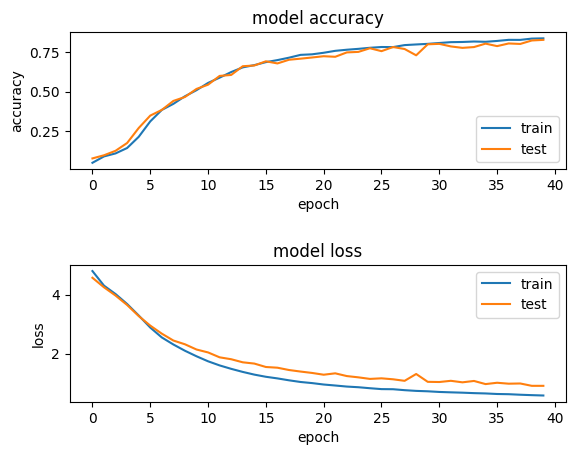

Final Test Accuracy: 0.8435173630714417


In [13]:
# Select the final model based on the max test accuracy across all models

best_model_index = model_accuracy.index(max(model_accuracy))

best_model = models[best_model_index]
best_model_history = model_history[best_model_index]
best_model_train_acc = model_train_acc[best_model_index]
best_model_train_loss = model_train_loss[best_model_index]
best_model_val_acc = model_val_acc[best_model_index]
best_model_val_loss = model_val_loss[best_model_index]

# summarize history for accuracy  
plt.subplot(211)  
plt.plot(best_model_history.history['accuracy'])  
plt.plot(best_model_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='lower right')  

# summarize history for loss
plt.subplot(212)  
plt.plot(best_model_history.history['loss'])  
plt.plot(best_model_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper right')  
plt.subplots_adjust(hspace=0.7)

plt.show() 

print("Final Test Accuracy:", model_accuracy[best_model_index])

In [14]:
#Select only the optimal number of input features for X_test
X_test = X_test[:,:(best_model_index+1)]

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)

# np.argmax() is used to convert the one-hot encoded predictions and test labels to class labels.
y_pred_label = np.argmax(y_pred, axis = 1)

# Print the classification report
print("Classification report:\n", classification_report(y_test_enc, y_pred_label))

424/424 [==============================] - 2s 2ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       591
           1       1.00      1.00      1.00       430
           2       1.00      1.00      1.00       419
           3       1.00      1.00      1.00       384
           4       1.00      1.00      1.00       339
           5       0.99      1.00      0.99       342
           6       1.00      1.00      1.00       310
           7       0.97      1.00      0.98       325
           8       0.71      0.99      0.83       294
           9       0.92      1.00      0.96       269
          10       0.90      1.00      0.95       296
          11       0.85      1.00      0.92       258
          12       0.98      1.00      0.99       247
          13       0.95      1.00      0.97       237
          14       0.93      1.00      0.96       239
          15       0.98      1.00      0.99       235
  

c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Pyhton3.10.0\lib\site-packages\sklearn\metrics\_classificat

In [15]:
# extract class labels from test data
class_test = y_test_enc

# Invert OsID_labels dictionary
inv_OsID_labels = {v: k for k, v in OsID_labels.items()}

# map OsID values to the class labels
OsID_test = [inv_OsID_labels.get(value, 'Unknown') for value in class_test]

# create dataframe with OsID, true class, predicted class, and true/false columns
results = pd.DataFrame({
    'OsID': OsID_test,
    'True Class': y_test_enc,
    'Predicted Class': y_pred_label,
    'True/False': class_test == y_pred_label
})

# display dataframe
print(results.head())

# save results_df to a CSV file
results.to_csv('MLP_gene classification.csv', index=False)

           OsID  True Class  Predicted Class  True/False
0  Os04g0475500         328              294       False
1  Os04g0659100         161              161        True
2  Os01g0686800          17               17        True
3  Os04g0107900          34               34        True
4  Os04g0517100           7                7        True


In [16]:
display(models_df)

,No of input features,Model accuracy
0,1,0.045
1,2,0.060
2,3,0.087
3,4,0.480
4,5,0.631
5,6,0.782
6,7,0.807
7,8,0.843
8,9,0.817
9,10,0.844
